# Predicting Car Market Prices
In this project, we will set out to predict market prices of vehicles based on a number of technical specifications like motor displacement, car weight, mileage, etc.. We will be working with a dataset from 1985 Ward's Automotive Yearbook, which can be found at the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/automobile

## Exploring the data
As is, the data file does not include the headers specified in the documentation, so we need to specify them when we import the file.

In [1]:
# import pandas library
import pandas as pd

# specify headers according to the documentation
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# import the car data into a pandas dataframe
cars = pd.read_csv('imports-85.data', names = cols)

# look at first few rows of the data
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


For our model, we want to focus on numeric, continuous variables as our features. Our target will be the 'price' column.

Let's select only the continuous, numeric columns from the data based on the documentation:

In [2]:
# select only the columns with continuous data
cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Cleaning the data
We don't want missing values in our data if we are going to use them for predictive modeling. The normalized-losses column contains "?" for some entries. We need to replace these values with NaN in order to use the column for predictions. We will also need to convert columns which contained "?" to numeric format after replacement.

To avoid biasing our model with disparate feature ranges, we will rescale our numeric columns from 0 to 1.

In [3]:
# import numpy library
import numpy as np

# replace ? with nan
numeric_cars = numeric_cars.replace("?", np.nan)

# cast the whole dataframe as numeric
numeric_cars = numeric_cars.astype("float")

# check which columns have null values
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Price is our target variable, so we want to exclude any rows missing a price value.

In [4]:
# drop rows missing a value for price
numeric_cars = numeric_cars.dropna(subset=['price'])

For the other columns we can replace values with the column mean.

In [5]:
# fill nan values with column means
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [6]:
# double-check for missing vals
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now that we have handled missing values, we should normalize our columns to avoid biasing the model. We need to leave price the same as it is our target, not a predictor.

In [7]:
# save the price column so that we can preserve the values
price_col = numeric_cars['price']

# normalize columns
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())

# restore original price values
numeric_cars['price'] = price_col

In [8]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Building our Model - KNN
Now that our data is clean, we are ready to begin implementing our model. We will start by implementing a simple univariate KNN model and testing how well it performs with each of our potential features. Then, we will evaluate the model performance for different values of k to determine our best hyper-parameters.

### Univariate Model - Evaulating Features

In [9]:
# import KNeighborsRegressor and mean_squared error functions from sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [10]:
# function knn_train_test takes a training column name, target column name,
# and dataframe object. It splits the data, fits the model to the training set,
# and makes preditions on the test set. It then computes and returns the
# root mean squared error of the model predictions.
# In its first iteration, the function uses the default number of neighbors, 5
def knn_train_test(feature_col, target_col, df):
    
    # initialize knn
    knn = KNeighborsRegressor()
    
    # initialize random seed for reproducibility
    np.random.seed(1)
    
    # randomize order of rows in the dataframe
    random_index = np.random.permutation(df.index)
    rand_df = df.reindex(random_index)
    
    # split the dataframe into a training half and testing half
    mid_row = int(len(rand_df) / 2)
    train_set = rand_df.iloc[:mid_row]
    test_set = rand_df.iloc[mid_row:]
    
    # fit the model to the training set
    knn.fit(train_set[[feature_col]], train_set[target_col])
    
    # test the model on the test set
    labels = knn.predict(test_set[[feature_col]])
    
    # compute and return the root mean squared error of the predictions
    return mean_squared_error(test_set[target_col], labels)**(1/2)

In [11]:
# Run the model on each of the possible features and output the RMSE for each
# Store the RMSE values in a dictionary in which the keys are the feature names
cols = numeric_cars.columns.tolist()
cols.remove('price')
rmse_vals = pd.Series({feature_col: knn_train_test(feature_col, 'price', numeric_cars) for feature_col in cols})

print(rmse_vals)

bore                 6780.627785
city-mpg             4766.422505
compression-rate     6610.812153
curb-weight          4401.118255
engine-size          3238.462830
height               8144.441043
highway-mpg          4630.026799
horsepower           4037.037713
length               5427.200961
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
wheel-base           5461.553998
width                4704.482590
dtype: float64


With a default k of 5 neighbors, the feature "engine-size" has the lowest root mean squared error.

### Univariate Model - Evaluating K
Now that we have evaluated the performance of each potential feature with the default number of neighbors, let's see how the performance of each feature is impacted by the number of neighbors.

We'll modify our earlier function to take a new parameter, k, specifying the number of nearest-neighbors for the model.

In [12]:
# the new version of knn_train_test takes an additional argument, k, specifying
# the number of nearest neighbors to pass to the KNN model
def knn_train_test(feature_col, target_col, df, k):
    
    # initialize knn
    knn = KNeighborsRegressor(n_neighbors = k)
    
    # initialize random seed for reproducibility
    np.random.seed(1)
    
    # randomize order of rows in the dataframe
    random_index = np.random.permutation(df.index)
    rand_df = df.reindex(random_index)
    
    # split the dataframe into a training half and testing half
    mid_row = int(len(rand_df) / 2)
    train_set = rand_df.iloc[:mid_row]
    test_set = rand_df.iloc[mid_row:]
    
    # fit the model to the training set
    knn.fit(train_set[[feature_col]], train_set[target_col])
    
    # test the model on the test set
    labels = knn.predict(test_set[[feature_col]])
    
    # compute and return the root mean squared error of the predictions
    return mean_squared_error(test_set[target_col], labels)**(1/2)

For each numeric column, we will run the KNN regressor with each of a set of k values (1, 3, 5, 7, and 9). Then we will evaluate the performance of each feature with each hyper-parameter.

In [13]:
# Set list of k-values
k_vals = [1,3,5,7,9]

# Initialize dictionary to store RMSE values. Each key will be a feature and each
# value will be a list of RMSEs. Each RMSE value is the result of the KNN model
# with the specified feature and k-value
rmse_vals = {}

# Iterate through features
for feature_col in cols:
    
    # Initialize list to store RMSE values
    feature_rmse_vals = []
    
    # Iterate through k-values
    for k in k_vals:
        
        # Run univariate KNN model with specified feature and k-value. Append
        # output RMSE to list.
        feature_rmse_vals.append(knn_train_test(feature_col, 'price', numeric_cars, k))
        
    # Add list of RMSEs to dictionary with corresponding feature key
    rmse_vals[feature_col] = feature_rmse_vals
    
# Convert dictionary to series and print results
rmse_vals = pd.DataFrame(rmse_vals, index=k_vals)
rmse_vals.head()

,bore,city-mpg,compression-rate,curb-weight,engine-size,height,highway-mpg,horsepower,length,normalized-losses,peak-rpm,stroke,wheel-base,width
1,8602.588485,5901.143574,8087.205347,5264.290231,3258.486106,8904.046456,6025.594967,4170.054848,4628.455501,7846.750605,9511.480068,9116.495955,4493.734069,4559.257298
3,6984.239489,4646.746409,7375.063686,5022.318012,2840.562806,8277.609643,4617.305020,4020.849263,5129.835821,7500.569812,8537.550900,7338.684670,5120.161506,4606.413692
5,6780.627785,4766.422505,6610.812153,4401.118255,3238.462830,8144.441043,4630.026799,4037.037713,5427.200961,7330.197653,7697.459696,8006.529545,5461.553998,4704.482590
7,6878.097966,5232.523034,6732.801283,4330.608104,3563.086774,7679.598124,4796.061440,4353.811860,5313.427721,7756.421586,7510.294160,7803.937797,5448.107051,4571.485046
9,6866.808502,5465.209493,7024.485525,4632.044474,3831.824415,7811.036063,5278.358057,4515.135617,5383.054515,7688.096097,7340.041341,7735.554366,5738.405685,4652.914172


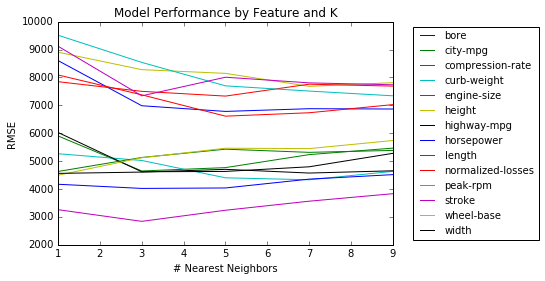

In [14]:
# Visualize the RMSEs
# import matplotlib pyplot
import matplotlib.pyplot as plt
%matplotlib inline

for col in rmse_vals.columns:
    rmse_vals[col].plot.line(label=col)
plt.xlabel('# Nearest Neighbors')
plt.ylabel('RMSE')
plt.title('Model Performance by Feature and K')
plt.legend(bbox_to_anchor =(1.45, 1), prop={'size' : 10})
plt.show()

### Multivariate Model
Now that we have a system by which to rate our features, we can start to build a multivariate model to predict car prices. We are going to update our function to take in a list of features.

To build a multivariate model with robust performance, we need to quantify how each feature impacts the RMSE. We'll start by passing to the model the top two features based on univariate model performance with k=5. Then, we will incrementally add each feature up to the top 5, and compare the model performances between feature sets.

In [22]:
# List the top 5 features and their RMSEs from the univariate model
top_5 = rmse_vals.loc[[5]].T.sort_values(by=5, ascending=True).head(5).T
top_5

,engine-size,horsepower,curb-weight,highway-mpg,width
5,3238.46283,4037.037713,4401.118255,4630.026799,4704.48259


In [23]:
# The new version of knn_train_test takes a list of feature columns rather than one
def knn_train_test(feature_cols, target_col, df, k):
    
    # initialize knn
    knn = KNeighborsRegressor(n_neighbors = k)
    
    # initialize random seed for reproducibility
    np.random.seed(1)
    
    # randomize order of rows in the dataframe
    random_index = np.random.permutation(df.index)
    rand_df = df.reindex(random_index)
    
    # split the dataframe into a training half and testing half
    mid_row = int(len(rand_df) / 2)
    train_set = rand_df.iloc[:mid_row]
    test_set = rand_df.iloc[mid_row:]
    
    # fit the model to the training set
    knn.fit(train_set[feature_cols], train_set[target_col])
    
    # test the model on the test set
    labels = knn.predict(test_set[feature_cols])
    
    # compute and return the root mean squared error of the predictions
    return mean_squared_error(test_set[target_col], labels)**(1/2)

In [28]:
# Iterate through feature sets, adding one feature for each set. For each
# feature set, run the model and return the RMSE values. We'll use the default
# k value of 5 for each iteration.
rmse_vals = {}
features = top_5.columns

for n in range(2,6):
    feature_cols = features[:n]
    rmse_vals[n] = (knn_train_test(feature_cols, 'price', numeric_cars, 5))

In [29]:
# Print the rmse values
rmse_vals

{2: 2949.8817277180374,
 3: 3435.2601095401815,
 4: 3286.5597353252815,
 5: 3410.2170133901805}

### Hyperparamater Tuning
Finally, let's optimize our model by modifying the hyperparameters. For each of the models in the last step, we will vary the value of k from 1 to 25 and compare the resulting RMSE values.

In [30]:
# Initialize dictionary to store values. Each key will be the number of features
# used and each value will be another dictionary. In the nested dictionary, each
# key will be the number of nearest neighbors used and each value will be the
# RMSE
rmse_vals = {}

for n in range(2,6):
    
    # Initialize nested dictionary to store k vals and RMSE vals
    k_rmses = {}
    
    for k in range(1,25):
        feature_cols = features[:n]
        k_rmses[k] = knn_train_test(feature_cols, 'price', numeric_cars, k)
        
    # Add nested dictionary to outer dictionary
    rmse_vals[n] = k_rmses

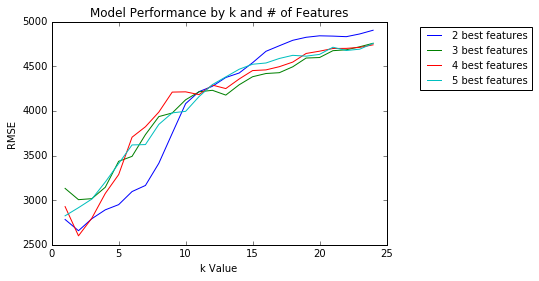

In [35]:
# Visualize results
for k, v in rmse_vals.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label="{} best features".format(k))
    
plt.xlabel('k Value')
plt.ylabel('RMSE')
plt.legend(bbox_to_anchor =(1.45, 1), prop={'size' : 10})
plt.title('Model Performance by k and # of Features')
plt.show()

Based on this analysis, it seems that the optimal model uses the top 4 best features ('engine size', 'horsepower', 'curb-weight', and 'highway-mpg') with 2 nearest neighbors.